In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('spotify_streams.csv')

# Clean data
# Drop columns
columns_to_drop = [
    'track_name',
    'artist(s)_name',
    'in_apple_charts', 
    'in_apple_playlists', 
    'in_deezer_playlists', 
    'in_deezer_charts', 
    'in_shazam_charts',
    'key',
    'cover_url'
]
data = data.drop(columns=columns_to_drop)

# Convert streams to numerical
columns_to_clean = ['streams']
for column in columns_to_clean:
    data[column] = data[column].str.replace(',', '')  # Remove commas
    data[column] = pd.to_numeric(data[column], errors='coerce')  # Convert to numeric

# Fill NaN in numerical columns with 0
data['streams'] = data['streams'].fillna(0)

# Fill NaN in 'key' with 'Unknown' (or another meaningful placeholder)
# data['key'] = data['key'].fillna('Unknown')

# Encode categorial variables
data['mode'] = data['mode'].map({'Major':1, 'Minor':0})
# data = pd.get_dummies(data, columns=['key'], drop_first=True)

# # Check for missing values
print(data.isnull().sum())

# # View the first few rows
print(data.head())

# # Summary statistics
# print(data.describe())

# # # Data types and missing values
print(data.info())


artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
bpm                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64
   artist_count  released_year  released_month  released_day  \
0             2           2023               7            14   
1             1           2023               3            23   
2             1           2023               6            30   
3             1           2019               8            23   
4             1           2023               5            18   

   in_spotify_playlists  in_spotify_charts      streams  bpm  mode  \
0                   553                147  141381703.0  125     1   
1                  1474                 48  13

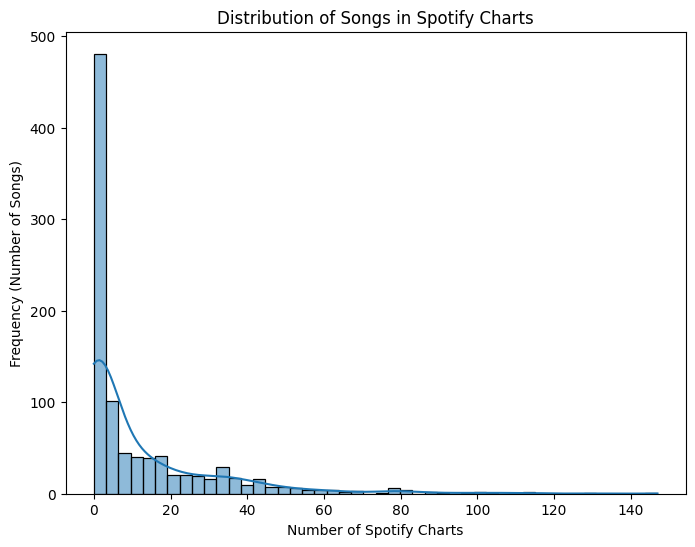

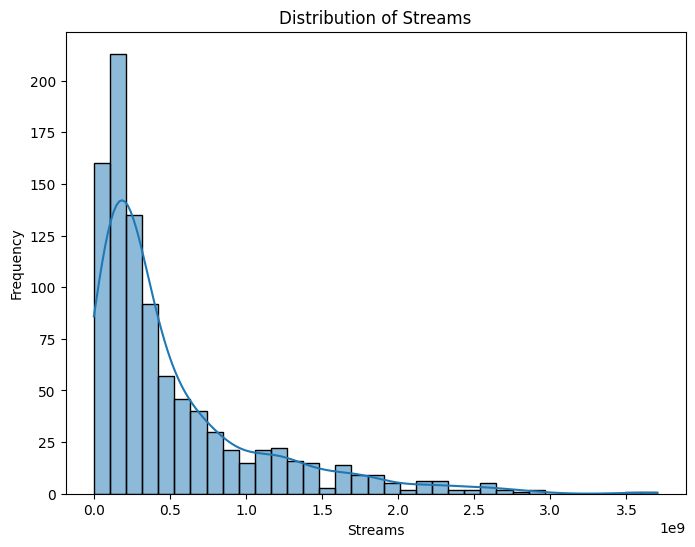

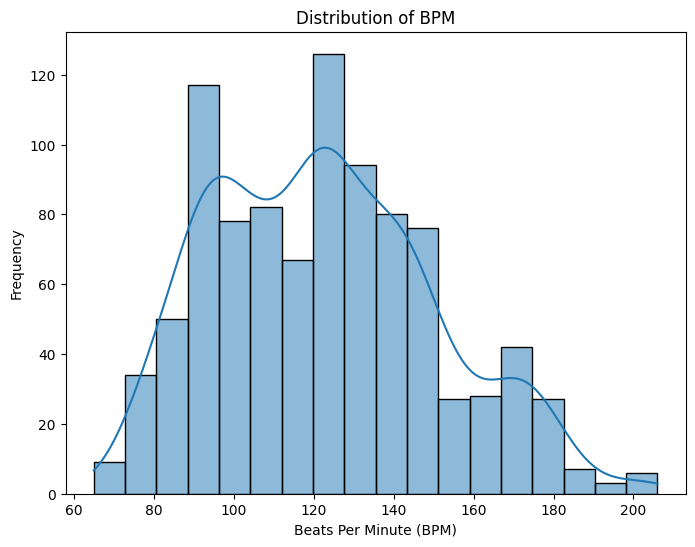

In [71]:
# Distribution of in_spotify_charts
plt.figure(figsize=(8,6))
sns.histplot(data['in_spotify_charts'], kde=True)
plt.title('Distribution of Songs in Spotify Charts')
plt.xlabel('Number of Spotify Charts')
plt.ylabel('Frequency (Number of Songs)')
plt.show()

# Distribution of Streams
plt.figure(figsize=(8,6))
sns.histplot(data['streams'], kde=True)
plt.title('Distribution of Streams')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.show()

# Distribution of BPM
plt.figure(figsize=(8,6))
sns.histplot(data['bpm'], kde=True)
plt.title('Distribution of BPM')
plt.xlabel('Beats Per Minute (BPM)')
plt.ylabel('Frequency')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

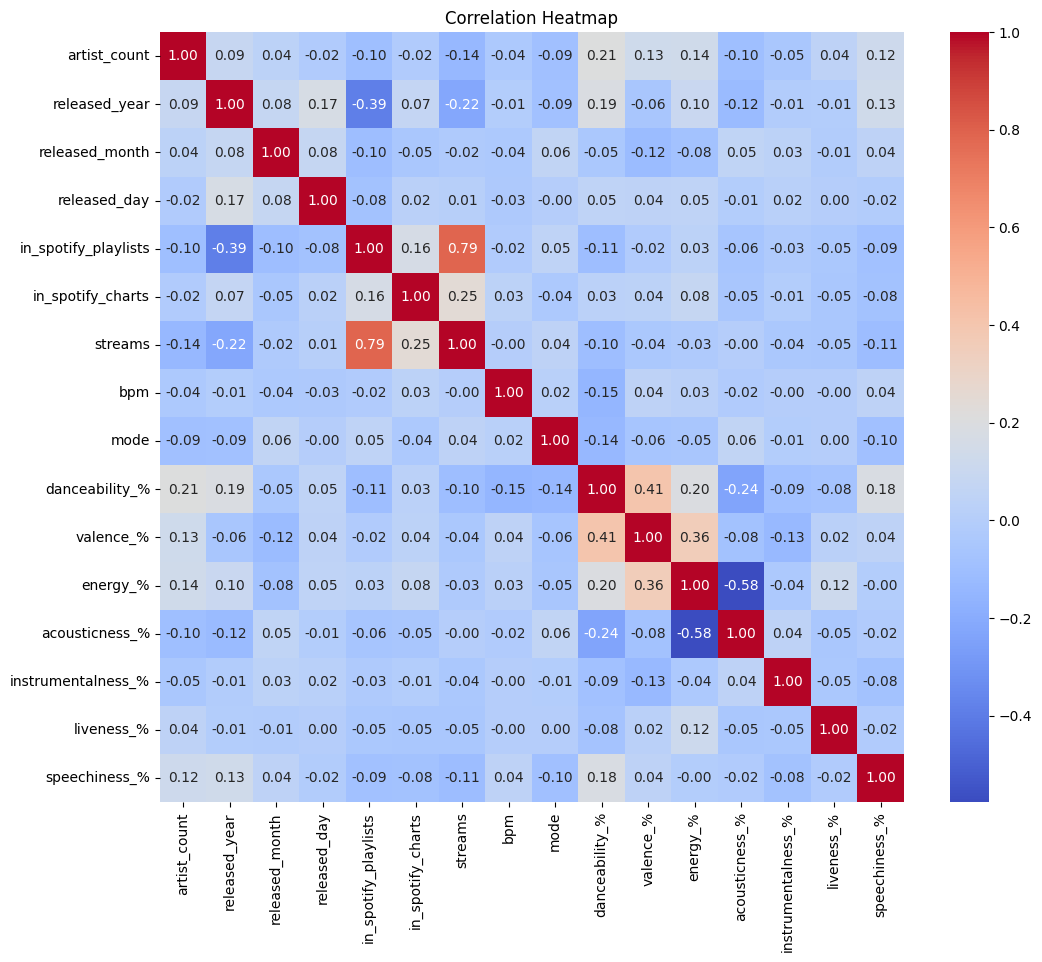

In [72]:
# plt.figure(figsize=(12,10))
# corr = data.corr()
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()


# Ensure only numeric columns are used for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show


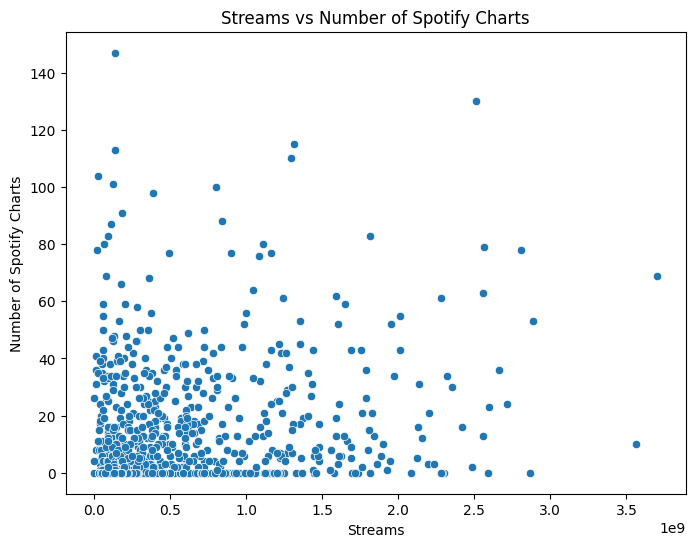

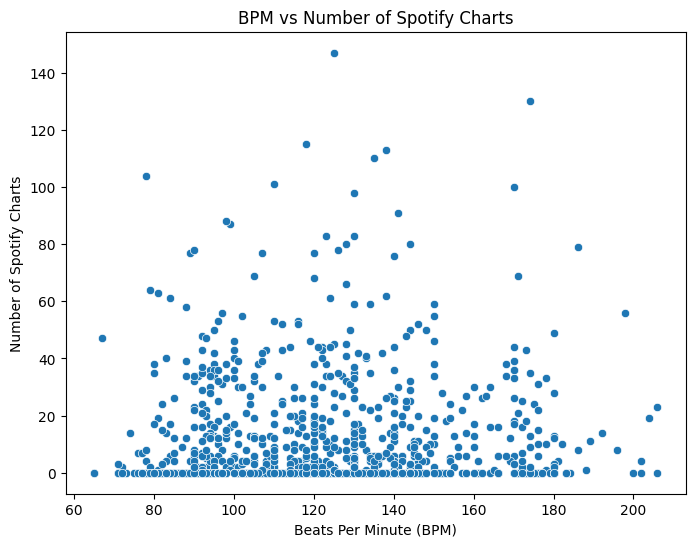

In [73]:
# Streams vs in_spotify_charts
plt.figure(figsize=(8,6))
sns.scatterplot(x='streams', y='in_spotify_charts', data=data)
plt.title('Streams vs Number of Spotify Charts')
plt.xlabel('Streams')
plt.ylabel('Number of Spotify Charts')
plt.show()

# BPM vs in_spotify_charts
plt.figure(figsize=(8,6))
sns.scatterplot(x='bpm', y='in_spotify_charts', data=data)
plt.title('BPM vs Number of Spotify Charts')
plt.xlabel('Beats Per Minute (BPM)')
plt.ylabel('Number of Spotify Charts')
plt.show()


In [74]:
# Analysis using Supervised Machine learning Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define target variable (number of Spotify charts)
y = data['in_spotify_charts']

# Ensure all remaining columns are numeric
X = X.select_dtypes(include=[np.number])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print(f"MSE: {mse_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")
print(f"R2 Score: {r2_lr:.2f}")


Linear Regression:
MSE: 236.69
MAE: 11.29
R2 Score: -0.03


In [75]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print(f"MSE: {mse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"R2 Score: {r2_rf:.2f}")

Random Forest Regressor:
MSE: 173.49
MAE: 8.79
R2 Score: 0.24


In [77]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit GridSearchCV
grid_rf.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_rf.best_params_)
print("Best Cross-Validation MSE:", -grid_rf.best_score_)

# Best model predictions
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("Tuned Random Forest Regressor:")
print(f"MSE: {mse_best_rf:.2f}")
print(f"MAE: {mae_best_rf:.2f}")
print(f"R2 Score: {r2_best_rf:.2f}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation MSE: 249.54131678157995
Tuned Random Forest Regressor:
MSE: 154.70
MAE: 8.41
R2 Score: 0.33


In [78]:
# Create a DataFrame to summarize model performance
model_performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Tuned Random Forest'],
    'MSE': [mse_lr, mse_rf, mse_best_rf],
    'MAE': [mae_lr, mae_rf, mae_best_rf],
    'R2 Score': [r2_lr, r2_rf, r2_best_rf]
})

print(model_performance)

                 Model         MSE        MAE  R2 Score
0    Linear Regression  236.688917  11.287169 -0.032467
1        Random Forest  173.492056   8.794712  0.243206
2  Tuned Random Forest  154.699137   8.412739  0.325183


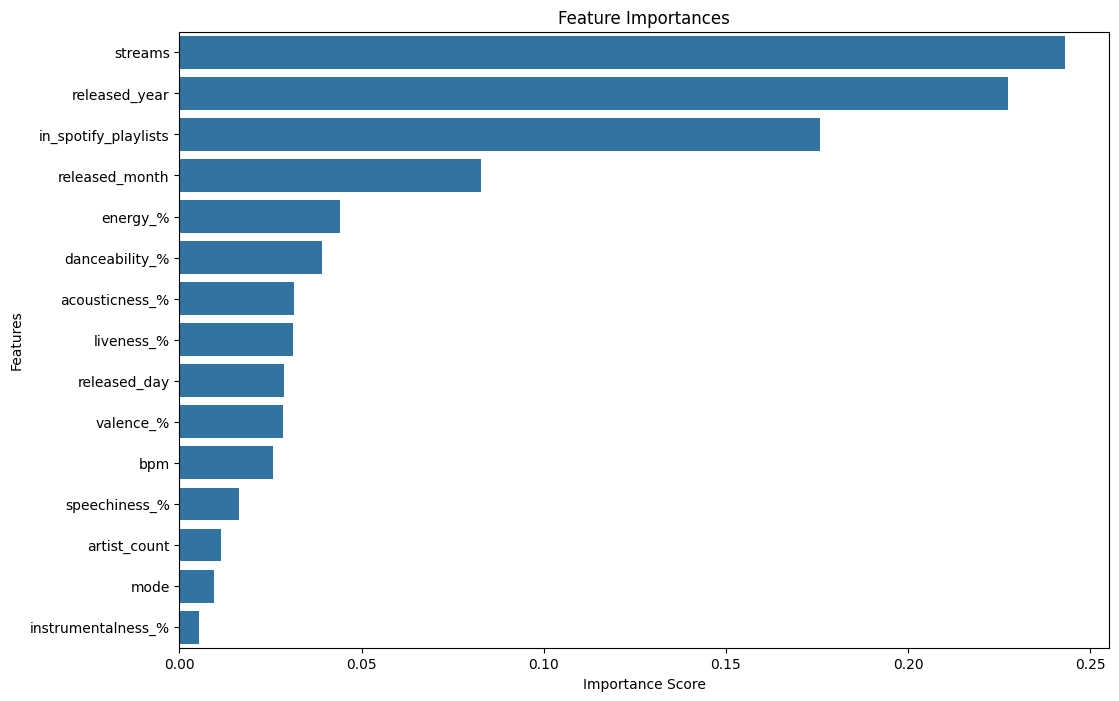

In [79]:
# Feature importance for Tuned Random Forest
importances = best_rf.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()